In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv("Data/train.csv")
data_C = data.copy()
print(data.shape)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# DATA
data = data_C
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [11]:
def init_params():
     w1 = np.random.rand(10, 784)
     b1 = np.random.rand(10, 1)
     w2 = np.random.rand(10, 10)
     b2 = np.random.rand(10, 1)
     return w1, b1, w2, b2

def ReLU(z):
     return np.maximum(0, z)

def sigmoid(z):
     return 1 / (1 + np.exp(-z))

def forward_prop(w1, b1, w2, b2, X):
     z1 = w1.dot(X) + b1
     a1 = ReLU(z1)
     z2 = w2.dot(a1) + b2
     a2 = sigmoid(z2)
     return z1, a1, z2, a2

def one_hot(y):
     one_hot_Y = np.zeros((y.size, y.max() + 1))
     one_hot_Y[np.arange(y.size), y] = 1
     one_hot_Y = one_hot_Y.T
     return one_hot_Y

def deriv_ReLU(z):
     return z > 0
def deriv_sigmoid(z):  
     return sigmoid(z) * (1 - sigmoid(z))

def back_prop(z1, a1, z2, a2, w2, x, y):
     np.set_printoptions(formatter={'float':'{:.5f}'.format})
     m = y.size
     yr = one_hot(y)
     cost = (a2 - yr)
     db2  = 1/m * np.sum(cost, axis=1).reshape(-1, 1)
     dw2 = 1/m * cost.dot(a1.T)
     dE1 = w2.T.dot(cost) * deriv_ReLU(z1)
     db1  = 1/m * np.sum(dE1, axis=1).reshape(-1, 1)
     dw1 = 1/m * dE1.dot(x.T)
     return dw1, db1 ,dw2 ,db2

def update_params(w1, b1, w2, b2, dw1, db1 ,dw2 ,db2, alpha):
     w1 = w1 - alpha * dw1
     b1 = b1 - alpha * db1
     w2 = w2 - alpha * dw2
     b2 = b2 - alpha * db2
     return w1, b1, w2, b2
     

In [21]:
def get_accuracy(predictions, y):
     return np.sum(predictions == y) / y.size

def get_predictions(a2):
     return np.argmax(a2, 0)

def gradient_descent(x, y, iterations, alpha):
     w1, b1 ,w2, b2 = init_params()
     for i in range(iterations):
          z1, a1, z2, a2, = forward_prop(w1, b1, w2, b2, x)
          dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
          w1, b1 ,w2, b2 = update_params(w1, b1, w2, b2, dw1, db1 ,dw2 ,db2, alpha)
          if i % 50 == 0:
               print("Iteration:", i)
               crnt_accuracy = get_accuracy(get_predictions(a2), y)*100
               crnt_accuracy_fomt = '{:.2f}'.format(crnt_accuracy)
               crnt_accuracy_dev = get_accuracy(get_predictions(a2), Y_dev)*100
               crnt_accuracy_dev_fomt = '{:.2f}'.format(crnt_accuracy_dev)
               print("accuracy with train data: ",crnt_accuracy_fomt, "%")
               print("accuracy with dev data: ",crnt_accuracy_fomt, "%\n")
     return w1, b1, w2, b2

In [22]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 800, 0.05)

Iteration: 0


ValueError: operands could not be broadcast together with shapes (41000,) (1000,) 

In [ ]:
crnt_accuracy = get_accuracy(get_predictions(a2), y)*100

In [17]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def false_predictions(w1, b1, w2, b2):
    values = []
    for index in range(X_train.shape[1]):
         prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
         label = Y_train[index]
         if prediction[0] != label:
             values.append(index)
    return values
         

Prediction:  [4]
Label:  4


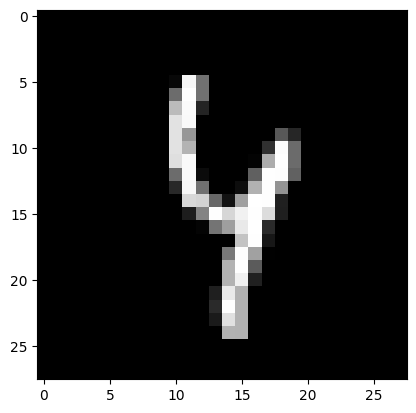

In [20]:
test_prediction(100, w1, b1, w2, b2)
#test_prediction(1, w1, b1, w2, b2)
#test_prediction(2, w1, b1, w2, b2)
#test_prediction(3, w1, b1, w2, b2)

In [16]:
false_val = false_predictions(w1, b1, w2, b2)
print(false_val)

[5, 26, 31, 35, 38, 44, 47, 50, 55, 61, 69, 72, 79, 80, 81, 85, 88, 91, 101, 108, 111, 113, 116, 126, 128, 137, 142, 150, 151, 153, 158, 166, 172, 175, 177, 182, 186, 190, 193, 195, 211, 217, 218, 219, 245, 256, 266, 267, 270, 280, 287, 293, 294, 303, 306, 315, 318, 320, 321, 324, 327, 335, 340, 344, 348, 350, 353, 354, 362, 370, 374, 378, 382, 384, 389, 399, 402, 406, 410, 416, 418, 432, 439, 441, 442, 444, 468, 475, 502, 503, 506, 515, 516, 523, 526, 530, 538, 548, 554, 556, 560, 562, 568, 581, 597, 598, 601, 605, 607, 612, 625, 643, 653, 657, 661, 685, 686, 691, 695, 699, 704, 720, 731, 734, 736, 748, 751, 756, 764, 771, 778, 781, 785, 792, 799, 801, 803, 809, 810, 812, 814, 818, 822, 825, 844, 845, 849, 855, 856, 858, 863, 868, 871, 875, 879, 882, 887, 889, 896, 908, 909, 912, 913, 923, 930, 931, 932, 941, 948, 958, 965, 967, 973, 976, 980, 992, 993, 997, 998, 1004, 1021, 1024, 1027, 1031, 1033, 1034, 1040, 1042, 1047, 1057, 1058, 1064, 1068, 1070, 1076, 1077, 1084, 1087, 1094, 109

In [19]:
Y_train.shape

(41000,)